
## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

from warnings import filterwarnings

In [6]:
data = pd.read_csv(r"C:\Users\Sony\Desktop\JUPYTER NOTEBOOK\UDEMY\PERIAN DATA SCIENCE\RESOURCES USED IN COURSE\DATA\wine_fraud.csv")

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [8]:
data["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [9]:
data["quality"].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

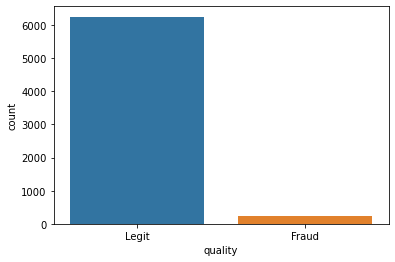

In [10]:
sns.countplot(data = data , x = "quality")

<AxesSubplot:xlabel='type', ylabel='count'>

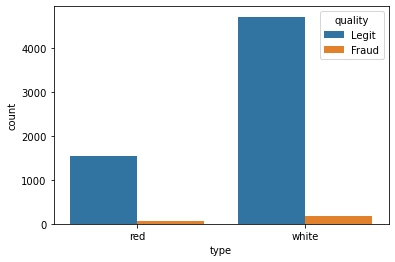

In [12]:
sns.countplot(data = data , x = "type", hue = "quality")

In [13]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [17]:
data[data["type"] == "white"].shape[0] # total white wine

4898

In [21]:
data[   (data["type"] == "white")   &  (data["quality"] == "Fraud")  ].shape[0]

183

In [24]:
print("Percentage of fraud in White Wines: " , (183 * 100) / 4898)

Percentage of fraud in White Wines:  3.736218864842793


In [25]:
data[data["type"] == "red"].shape[0] # total white wine

1599

In [28]:
data[   (data["type"] == "red")   &  (data["quality"] == "Fraud")  ].shape[0]

63

In [29]:
print("Percentage of fraud in Red Wines: " , (63 * 100) / 1599)

Percentage of fraud in Red Wines:  3.9399624765478425


In [31]:
data["Fraud"] = data["quality"].map({ "Legit" : 0 , "Fraud" : 1 })

In [34]:
data["Fraud"].value_counts()

0    6251
1     246
Name: Fraud, dtype: int64

In [46]:
correln = data.corr()["Fraud"][:-1].sort_valuesalues()

In [47]:
correln

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: Fraud, dtype: float64

In [44]:
correln.values

array([ 0.02179396,  0.15122798, -0.06178946, -0.04875596,  0.03449946,
       -0.08520433, -0.0352524 ,  0.01635128,  0.02010727, -0.03404621,
       -0.05114074])

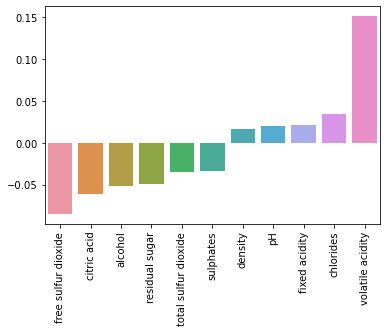

In [50]:
sns.barplot(x = correln.index , y = correln.values)

plt.xticks(rotation = 90);

----
## Machine Learning Model



In [52]:
data = data.drop("Fraud" , axis = 1)

In [53]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [55]:
data["type"] = pd.get_dummies(data["type"] , drop_first=True)

In [56]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [58]:
X = data.drop("quality", axis = 1)

y = data["quality"]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scalar = StandardScaler()

In [63]:
scaled_X_train = scalar.fit_transform(X_train)

scaled_X_test = scalar.transform(X_test)

In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC(class_weight = "balanced")

 **Using a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {"C" : [0.001 , 0.01 , 0.1 , 0.5 , 1]}

In [68]:
grid = GridSearchCV(svc , param_grid)

In [70]:
grid.fit(scaled_X_train , y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [71]:
grid.best_params_

{'C': 1}

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [75]:
y_pred = grid.predict(scaled_X_test)

In [76]:
accuracy_score(y_test , y_pred)

0.8430769230769231

In [77]:
confusion_matrix(y_test , y_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [78]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

